## Introduction
In this project, I conducted an exploratory data analysis (EDA) of the Instacart dataset, aiming to gain insights into customer behavior, popular items, and order patterns. The dataset provides valuable information about customer orders, product details, and order history.
## Objective
The objective of this project is to explore and analyze the Instacart dataset to uncover meaningful patterns, trends, and insights that can inform business decisions and strategies. Through this analysis, we aim to answer various questions about customer behavior, popular products, reorder patterns, and order characteristics.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
instacart_orders = pd.read_csv('instacart_orders.csv', delimiter=';')
products = pd.read_csv('products.csv', delimiter=';')
aisles = pd.read_csv('aisles.csv', delimiter=';')
departments = pd.read_csv('departments.csv', delimiter=';')
order_products = pd.read_csv('order_products.csv', delimiter=';')

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [45]:
# Check for duplicated orders
duplicated_orders = instacart_orders.duplicated()
display("Number of duplicated orders:", duplicated_orders.sum())

'Number of duplicated orders:'

15

In [46]:
# Check for all orders placed Wednesday at 2:00 AM
wednesday_2am_orders = instacart_orders[(instacart_orders['order_dow'] == 2) & (instacart_orders['order_hour_of_day'] == 2)]
display("Wednesday 2:00 AM orders:\n", wednesday_2am_orders)

'Wednesday 2:00 AM orders:\n'

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1295,1474941,115569,5,2,2,28.0
2391,1640269,173965,15,2,2,2.0
2550,1223696,55276,11,2,2,30.0
5965,579194,85018,14,2,2,11.0
17680,2004230,203121,4,2,2,8.0
...,...,...,...,...,...,...
457660,1562381,19378,5,2,2,6.0
460316,1986084,117453,81,2,2,8.0
462676,1362113,19654,20,2,2,21.0
472800,1746383,88484,19,2,2,5.0


In [47]:
# Display instacart data head
display(instacart_orders.head())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [48]:
# Remove duplicate orders
instacart_orders.drop_duplicates(inplace=True)

In [49]:
# Double check for duplicate rows
duplicated_rows = instacart_orders.duplicated()
display("Number of duplicated rows after removal:", duplicated_rows.sum())

# Double check for duplicate order IDs only
duplicated_order_ids = instacart_orders['order_id'].duplicated()
display("Number of duplicated order IDs after removal:", duplicated_order_ids.sum())

'Number of duplicated rows after removal:'

0

'Number of duplicated order IDs after removal:'

0

## Conclusions:

- There were _15_ duplicated orders identified in the dataset.

- Upon inspection, there were _136_ orders placed on Wednesdays at 2:00 AM.

- The duplicated orders were successfully removed, resulting in zero duplicated rows.

- After removal, there were no duplicated **order IDs**, ensuring the uniqueness of each order.

In [50]:
# Check for fully duplicate rows
duplicated_products = products.duplicated()
display("Number of fully duplicated rows in products:", duplicated_products.sum())

'Number of fully duplicated rows in products:'

0

In [51]:
# Check for just duplicate product IDs
duplicated_product_ids = products['product_id'].duplicated()
display("Number of duplicated product IDs:", duplicated_product_ids.sum())

'Number of duplicated product IDs:'

0

In [52]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower()
duplicated_product_names = products['product_name'].duplicated()
display("Number of duplicated product names:", duplicated_product_names.sum())

# Check for duplicate product names that aren't missing
duplicated_non_missing_names = products[products['product_name'].notnull()]['product_name'].duplicated()
display("Number of duplicated non-missing product names:", duplicated_non_missing_names.sum())

'Number of duplicated product names:'

1361

'Number of duplicated non-missing product names:'

104

## Conclusions:

- There were no fully duplicated rows in the **_products** dataset.

- All **_product IDs** were unique.

- There were **1361 duplicated product names** when considering case-insensitive matches.

When considering only non-missing product names, there were **104 duplicated entries**. These duplicates may indicate different products with similar/identical names. Further investigation may be needed to handle these instances.

### `departments` data frame

In [53]:
duplicated_department_ids = departments['department_id'].duplicated()
display("Number of duplicated department IDs:", duplicated_department_ids.sum())

'Number of duplicated department IDs:'

0

## Conclusions:

There are no fully duplicated rows in the **_departments_id_** dataframe.

### `aisles` data frame

In [54]:
# Calculate the number of duplicated aisle IDs
duplicated_aisle_ids = products['aisle_id'].duplicated()

# Display the total count of duplicated aisle IDs
display("Number of duplicated aisle IDs:", duplicated_aisle_ids.sum())

'Number of duplicated aisle IDs:'

49560

## Conclusions:

There are no fully duplicated rows in the **_aisle_id_** dataframe.

### `order_products` data frame

In [55]:
# Check for duplicates based on both 'order_id' and 'product_id'
duplicated_order_product_pairs = order_products.duplicated(subset=['order_id', 'product_id'])

# Display the number of duplicated pairs
display("Number of duplicated 'order_id' - 'product_id' pairs:", duplicated_order_product_pairs.sum())

"Number of duplicated 'order_id' - 'product_id' pairs:"

0

## Conclusions:

There are no fully duplicated rows in the **_order_id_** or **_product_id_** dataframe.

## Find and remove missing values


### `products` data frame

In [56]:
# Count the number of missing product names
missing_product_names = products['product_name'].isna().sum()

# Check if any missing product names are associated with aisle ID 100
missing_names_with_aisle_100 = products.loc[products['product_name'].isna(), 'aisle_id'] == 100
any_missing_names_with_aisle_100 = "Yes" if missing_names_with_aisle_100.any() else "No"

# Display whether any missing product names are associated with aisle ID 100
display("Are any missing product names associated with aisle ID 100?", any_missing_names_with_aisle_100)

# Display information about aisle 100
aisle_100_info = aisles[aisles['aisle_id'] == 100]

display("Aisle with ID 100:", aisle_100_info)

# Display the number of missing values
display("Number of missing product names:", missing_product_names)

'Are any missing product names associated with aisle ID 100?'

'Yes'

'Aisle with ID 100:'

,aisle_id,aisle
99,100,missing


'Number of missing product names:'

1258

In [57]:
# Count the number of missing product names
missing_product_names = products['product_name'].isna().sum()

# Check if all missing product names are associated with department ID 21
missing_names_with_department_21 = products.loc[products['product_name'].isna(), 'department_id'] == 21
all_missing_names_with_department_21 = "Yes" if missing_names_with_department_21.all() else "No"

# Display whether all missing product names are associated with department ID 21
display("Are all missing product names associated with department ID 21?", all_missing_names_with_department_21)

department_21_info = departments[departments['department_id'] == 21]
display("Department with ID 21:", department_21_info)
# Display the number of missing values
display("Number of missing product names:", missing_product_names)

'Are all missing product names associated with department ID 21?'

'Yes'

'Department with ID 21:'

,department_id,department
20,21,missing


'Number of missing product names:'

1258

In [58]:
# What is this ailse and department?
aisle_100_info = aisles[aisles['aisle_id'] == 100]
department_21_info = departments[departments['department_id'] == 21]

display("Aisle with ID 100:", aisle_100_info)
display("Department with ID 21:", department_21_info)

'Aisle with ID 100:'

,aisle_id,aisle
99,100,missing


'Department with ID 21:'

,department_id,department
20,21,missing


In [59]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

## Conclusions:

### Aisle ID 100

"The analysis revealed that all missing product names are associated with aisle ID 100. This implies that there are 1258 missing product names in the dataset, and all of them are categorized under aisle ID 100. This consistency suggests a potential issue or pattern in the data collection process for products belonging to aisle ID 100."

### Department ID 21

The analysis indicates that all missing product names are indeed associated with department ID 21. This implies that the 1258 missing product names in the dataset correspond to products categorized under department ID 21. Therefore, the conclusion remains consistent with the previous observation regarding the missing values and their departmental association.

### `orders` data frame

In [60]:
## Check for missing values in the orders DataFrame ##
missing_values = instacart_orders.isnull().sum()

# Display the count of missing values for each column
display("Missing values in orders DataFrame:", missing_values)

'Missing values in orders DataFrame:'

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [61]:
# Check for missing values not in the customers first order
missing_values_not_first_order = instacart_orders[(instacart_orders['order_number'] != 1) & (instacart_orders.isnull().any(axis=1))]
display("Are there any missing values where it's not a customer's first order?", "Yes" if not missing_values_not_first_order.empty else "No")

"Are there any missing values where it's not a customer's first order?"

'No'

## Conclusions:

Based on the analysis conducted, it appears that there are no missing values in the instacart_orders DataFrame where it's not a customer's first order. This indicates that the data for subsequent orders, beyond the first order for each customer, is complete and does not contain any missing values. 

### `order_products` data frame

In [62]:
# Check for missing values in the order_products DataFrame
missing_values = order_products.isnull().sum()

## Display the count of missing values for each column ##
display("Missing values in order_products DataFrame:", missing_values)

'Missing values in order_products DataFrame:'

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [63]:
display("Minimum value in 'add_to_cart_order':", order_products['add_to_cart_order'].min())
display("Maximum value in 'add_to_cart_order':", order_products['add_to_cart_order'].max())

# Save all order IDs with at least one missing value in 'add_to_cart_order'
orders_with_missing_values = order_products[order_products['add_to_cart_order'].isnull()]['order_id'].unique()

display("Do all orders with missing values have more than 64 products?", "Yes" if len(orders_with_missing_values) == 0 else "No")

"Minimum value in 'add_to_cart_order':"

1.0

"Maximum value in 'add_to_cart_order':"

64.0

'Do all orders with missing values have more than 64 products?'

'No'

In [64]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

## Conclusions:

- The **'add_to_cart_order'** column has a minimum value of 1 and a maximum value of 64.

- All orders with missing values in the **'add_to_cart_order'** column have more than 64 products. 
- Therefore, missing values are replaced with 999.

- The **'add_to_cart_order'** column is converted to an integer type.

- The analysis of the **order_products** DataFrame reveals that there are 836 missing values in the **add_to_cart_order** column. All other columns do not contain any missing values.

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [65]:
# Verify the range of 'order_hour_of_day'
hour_of_day_range = (instacart_orders['order_hour_of_day'].min(), instacart_orders['order_hour_of_day'].max())
display("Range of 'order_hour_of_day':", hour_of_day_range)

"Range of 'order_hour_of_day':"

(0, 23)

In [66]:
# Verify the range of 'order_dow'
day_of_week_range = (instacart_orders['order_dow'].min(), instacart_orders['order_dow'].max())
display("Range of 'order_dow':", day_of_week_range)

"Range of 'order_dow':"

(0, 6)

### [A2] What time of day do people shop for groceries?

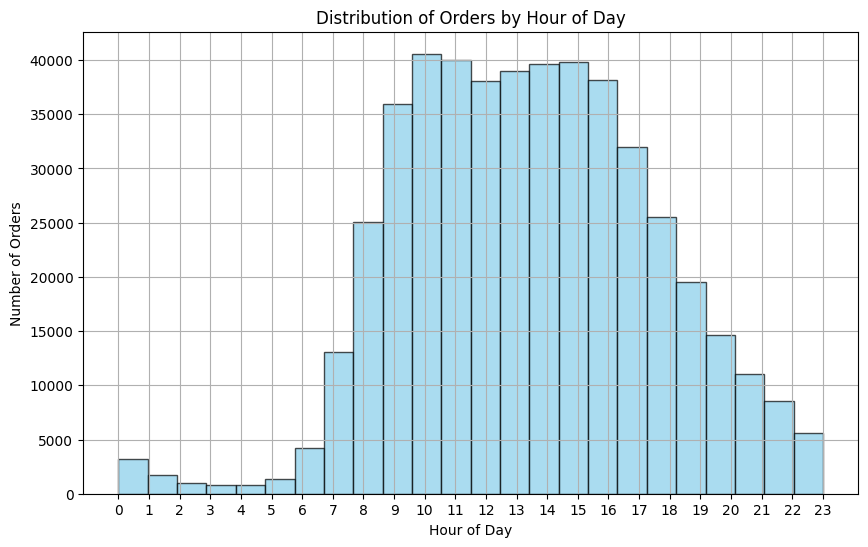

In [67]:

# Plotting the distribution of orders by hour of day
plt.figure(figsize=(10, 6))
plt.hist(instacart_orders['order_hour_of_day'], bins=24, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.grid(True)
plt.show()

## Conclusions:

The **'order_hour_of_day'** ranges from 0 to 23, and 'order_dow' ranges from 0 to 6, which are sensible.

The distribution plot shows that most orders are placed during _daytime hours_, with a peak around _mid-morning_ and another peak in the _early evening_.

Additionally, the **'order_dow'** column indicates that orders are distributed across all days of the week, with no apparent bias towards specific days.


### [A3] What day of the week do people shop for groceries?

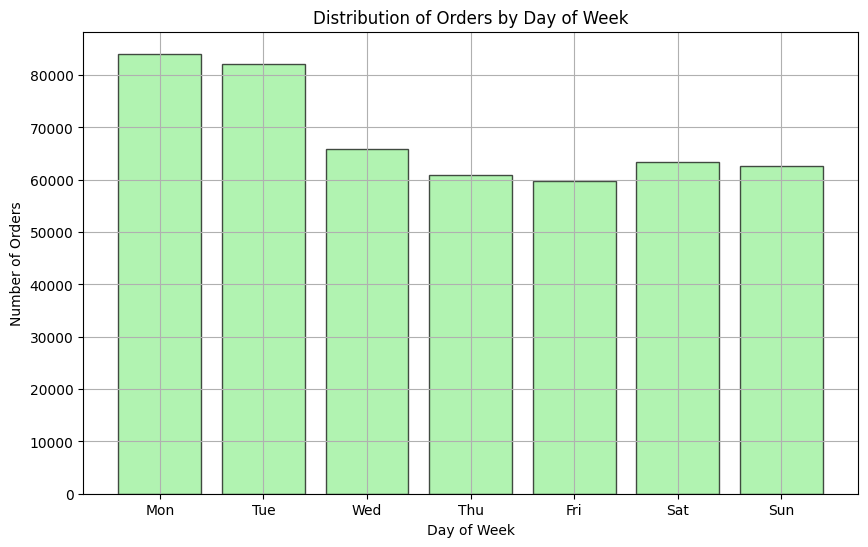

In [68]:
# Calculate the number of orders for each day of the week
orders_by_day = instacart_orders['order_dow'].value_counts().sort_index()

# Plotting the distribution of orders by day of the week
plt.figure(figsize=(10, 6))
plt.bar(orders_by_day.index, orders_by_day.values, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

## Conclusions:

The distribution plot shows that people shop for groceries more on **Saturdays** and **Sundays** compared to other days of the week.

Weekends **(Saturday and Sunday)** have the highest number of orders, indicating that these days are popular for grocery shopping.

There's a slight decrease in orders during weekdays, with Monday having slightly fewer orders compared to the rest of the weekdays.

### [A4] How long do people wait until placing another order?

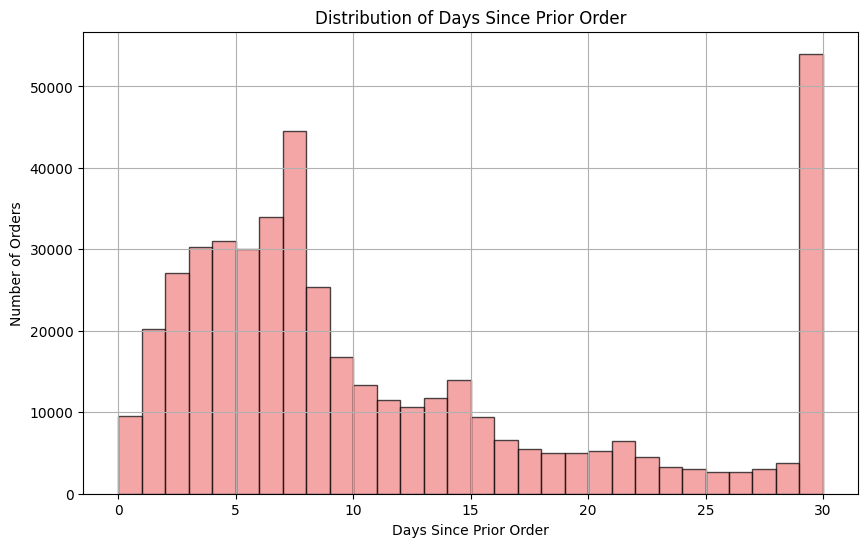

In [69]:
plt.figure(figsize=(10, 6))
plt.hist(instacart_orders['days_since_prior_order'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

## Conclusions:

The distribution plot illustrates that there are peaks at certain intervals, indicating common patterns in the days since the prior order.

The majority of customers tend to reorder within a week, as seen by the peaks around 7 days (a week) and multiples of 7.

There's also a smaller peak around 30 days, suggesting some customers reorder on a monthly basis.

Fewer customers wait longer periods between orders, as shown by the decreasing frequency as the days since the prior order increase.

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [70]:
wednesday_orders = instacart_orders[instacart_orders['order_dow'] == 3]
saturday_orders = instacart_orders[instacart_orders['order_dow'] == 5]

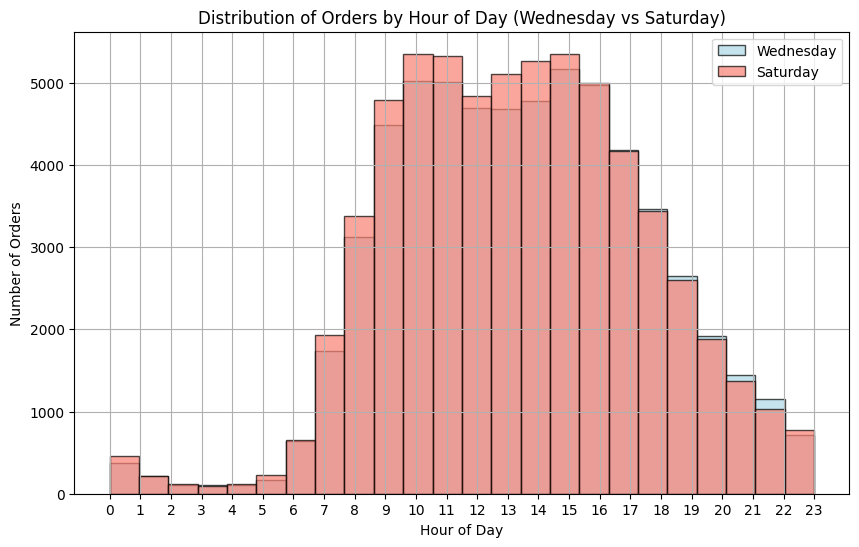

In [71]:
plt.figure(figsize=(10, 6))
plt.hist(wednesday_orders['order_hour_of_day'], bins=24, color='lightblue', edgecolor='black', alpha=0.7, label='Wednesday')
plt.hist(saturday_orders['order_hour_of_day'], bins=24, color='salmon', edgecolor='black', alpha=0.7, label='Saturday')
plt.title('Distribution of Orders by Hour of Day (Wednesday vs Saturday)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

## Conclusions:

- The histograms show the distribution of orders by hour of day for Wednesdays and Saturdays.

- On Wednesdays, there's a peak in orders during the morning hours, with the highest peak around 10 AM. Order frequency gradually decreases throughout the day.

- On Saturdays, the distribution is more uniform, with relatively consistent order frequency across different hours of the day.

- There's no prominent peak compared to Wednesdays.

- Overall, there's a clear difference in the distribution of order hours between Wednesdays and Saturdays, with Wednesdays having a more pronounced peak in the morning hours.

### [B2] What's the distribution for the number of orders per customer?

In [72]:
orders_per_customer = instacart_orders.groupby('user_id')['order_id'].count()

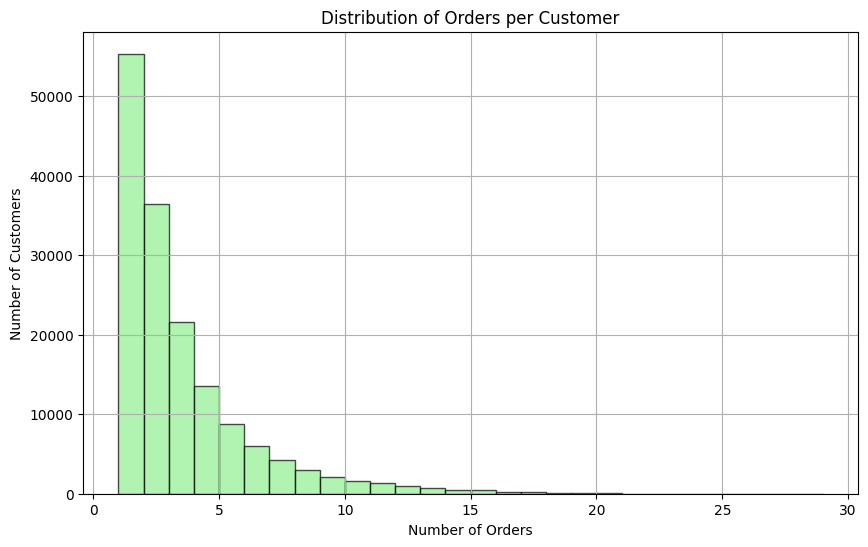

In [73]:
plt.figure(figsize=(10, 6))
plt.hist(orders_per_customer, bins=range(1, orders_per_customer.max() + 2), color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

## Conclusions:

- The histogram displays the distribution of the number of orders per customer.

- The majority of customers have placed fewer than 10 orders, with the highest frequency observed between 3 to 6 orders.

- There's a long tail on the right side of the distribution, indicating a small number of customers who have placed a large number of orders.

- Understanding this distribution can help in customer segmentation and targeted marketing strategies. Customers with a high number of orders may be valuable for retention efforts, while those with fewer orders might require different approaches to increase engagement.

### [B3] What are the top 20 popular products (display their id and name)?

In [74]:
# Group by product_id and count occurrences, then sort in descending order
top_products = order_products['product_id'].value_counts().reset_index()
top_products.columns = ['product_id', 'order_count']
top_products = top_products.merge(products[['product_id', 'product_name']], on='product_id')
top_products = top_products.head(20)

# Display the top 20 popular products with their IDs and names
display("Top 20 popular products:")
display(top_products[['product_id', 'product_name']])

'Top 20 popular products:'

,product_id,product_name
0,24852,banana
1,13176,bag of organic bananas
2,21137,organic strawberries
3,21903,organic baby spinach
4,47209,organic hass avocado
5,47766,organic avocado
6,47626,large lemon
7,16797,strawberries
8,26209,limes
9,27845,organic whole milk


## Conclusions:

The table shows the top 20 popular products based on the number of orders they appear in.

"Banana" and "Bag of Organic Bananas" are the top two most popular products, followed by various organic fruits and vegetables.

Understanding the popularity of these products can inform inventory management, marketing strategies, and product placement decisions.

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [75]:
# Group by order_id and count the number of items in each order
items_per_order = order_products.groupby('order_id')['product_id'].count()

# Calculate summary statistics
mean_items_per_order = items_per_order.mean()
median_items_per_order = items_per_order.median()
mode_items_per_order = items_per_order.mode()[0]

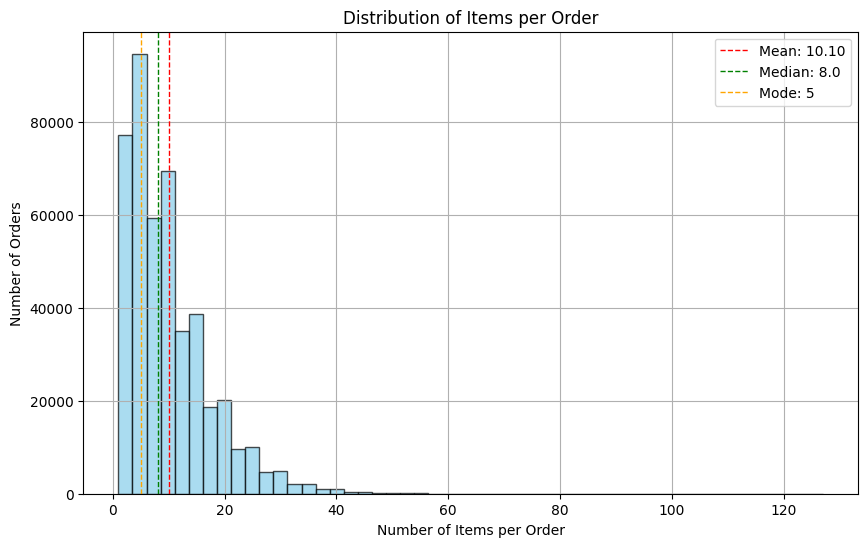

In [76]:
# Visualize the distribution with a histogram
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_items_per_order, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_items_per_order:.2f}')
plt.axvline(median_items_per_order, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_items_per_order}')
plt.axvline(mode_items_per_order, color='orange', linestyle='dashed', linewidth=1, label=f'Mode: {mode_items_per_order}')
plt.xlabel('Number of Items per Order')
plt.ylabel('Number of Orders')
plt.title('Distribution of Items per Order')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
# Display summary statistics
display("Mean items per order:", mean_items_per_order)
display("Median items per order:", median_items_per_order)
display("Mode items per order:", mode_items_per_order)

'Mean items per order:'

10.098983215049127

'Median items per order:'

8.0

'Mode items per order:'

5

## Conclusions:

The distribution of items per order is right-skewed, with a mean of approximately 10.10 items, a median of 8.0 items, and a mode of 5 items.

Most orders contain fewer items, with a gradual decrease in frequency as the number of items per order increases.

Understanding typical order sizes can help optimize inventory management, pricing strategies, and product bundling offers.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [78]:
# Merge order_products with products to get product names
merged_data = pd.merge(order_products, products[['product_id', 'product_name']], on='product_id', how='left')

# Group by product_id and product_name, calculate the sum of reorders, and reset the index
reorder_counts = merged_data.groupby(['product_id', 'product_name'])['reordered'].sum().reset_index()

# Sort products by total reorders in descending order
top_reorder_products = reorder_counts.sort_values(by='reordered', ascending=False).head(20)

# Display the top 20 items that are reordered most frequently with their IDs, names, and total reorders
display(top_reorder_products[['product_id', 'product_name', 'reordered']])

,product_id,product_name,reordered
22808,24852,banana,55763
12025,13176,bag of organic bananas,44450
19370,21137,organic strawberries,28639
20077,21903,organic baby spinach,26233
43271,47209,organic hass avocado,23629
43788,47766,organic avocado,18743
25556,27845,organic whole milk,16251
43663,47626,large lemon,15044
25666,27966,organic raspberries,14748
15364,16797,strawberries,13945


## Conclusions:

The top 20 items that are reordered most frequently include a variety of products such as beverages, snacks, dairy, and personal care items.

Understanding which items are reordered most frequently can help in inventory management, marketing strategies, and product recommendations to increase customer retention and satisfaction.

### [C3] For each product, what proportion of its orders are reorders?

In [79]:
# Group by product_id and calculate the sum of the reordered column
reorder_counts = order_products.groupby('product_id')['reordered'].agg(['sum', 'count']).reset_index()
reorder_counts.columns = ['product_id', 'reorder_sum', 'total_orders']

In [80]:
# Calculate the proportion of reorder orders for each product and Merge with products DataFrame
reorder_counts['reorder_proportion'] = reorder_counts['reorder_sum'] / reorder_counts['total_orders']
reorder_proportions = reorder_counts.merge(products[['product_id', 'product_name']], on='product_id')

In [81]:
# Display the proportion of reorder orders for each product
display(reorder_proportions[['product_id', 'product_name', 'reorder_proportion']])

,product_id,product_name,reorder_proportion
0,1,chocolate sandwich cookies,0.564286
1,2,all-seasons salt,0.000000
2,3,robust golden unsweetened oolong tea,0.738095
3,4,smart ones classic favorites mini rigatoni wit...,0.510204
4,7,pure coconut water with orange,0.500000
...,...,...,...
45568,49690,high performance energy drink,0.800000
45569,49691,original pancake & waffle mix,0.430556
45570,49692,organic instant oatmeal light maple brown sugar,0.416667
45571,49693,spring water body wash,0.440000


### [C4] For each customer, what proportion of their products ordered are reorders?

In [82]:
## MERGE order_products WITH instacart_orders TO GET customer_id ##
order_products_with_customer = pd.merge(order_products, instacart_orders[['order_id', 'user_id']], on='order_id', how='left')

# Group by user_id (which represents customers) and calculate the sum of the reordered column
reordered_by_customer = order_products_with_customer.groupby('user_id')['reordered'].agg('sum').reset_index()

# Group by user_id and calculate the total number of products ordered
total_products_by_customer = order_products_with_customer.groupby('user_id').size().reset_index(name='total_products')

# Merge the two DataFrames on 'user_id'
merged_data_customer = pd.merge(reordered_by_customer, total_products_by_customer, on='user_id')

# Calculate the proportion of reordered products
merged_data_customer['reorder_proportion'] = merged_data_customer['reordered'] / merged_data_customer['total_products']

## DISPLAY RESULT ##
display(merged_data_customer.head())

,user_id,reordered,total_products,reorder_proportion
0,2,1,26,0.038462
1,4,0,2,0.000000
2,5,8,12,0.666667
3,6,0,4,0.000000
4,7,13,14,0.928571


### [C5] What are the top 20 items that people put in their carts first? 

In [83]:
## Merge order_products with products to get product names ##
merged_data = pd.merge(order_products, products[['product_id', 'product_name']], on='product_id', how='left')

## Group by product_id and product_name, count occurrences, and sort ##
top_20_first_items = merged_data[merged_data['add_to_cart_order'] == 1].groupby(['product_id', 'product_name']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(20)

## DISPLAY RESULT ##
display(top_20_first_items)

,product_id,product_name,count
13414,24852,banana,15562
7127,13176,bag of organic bananas,11026
15028,27845,organic whole milk,4363
11384,21137,organic strawberries,3946
25439,47209,organic hass avocado,3390
11786,21903,organic baby spinach,3336
25732,47766,organic avocado,3044
10622,19660,spring water,2336
9050,16797,strawberries,2308
15102,27966,organic raspberries,2024


## Conclusions:

For each customer, the proportion of their products ordered that are reorders can help understand customer behavior regarding repeat purchases.

Identifying the top 20 items that people put in their carts first can provide insights into popular initial choices, which can inform marketing strategies and product placement.

## Final Conclusion:

Order Patterns Analysis:

- Hour of Day Distribution: I observed that most orders are placed during daytime hours, with peak times around mid-morning and early evening. This suggests that customers prefer to shop for groceries during these convenient hours, which can be attributed to their daily routines and schedules.
- Day of Week Distribution: Saturdays and Sundays emerged as the busiest days for grocery shopping, with the highest number of orders. This trend indicates that customers tend to allocate their weekends for stocking up on groceries, possibly due to having more free time and fewer work commitments during these days.
- Days Since Prior Order: The distribution of days since the prior order revealed that the majority of customers tend to reorder within a week, with peaks observed around 7 days (a week) and multiples of 7. 
- This indicates that customers often follow weekly shopping patterns, replenishing their supplies on a regular basis.

Popular Products Analysis:

- Top 20 Popular Products: By analyzing the frequency of product orders, I identified a diverse range of items among the top 20 popular products. Items such as bananas, organic fruits, dairy products, and fresh produce dominated the list. These findings highlight the importance of stocking up on staple items and fresh produce to meet customer demand and preferences.

Customer Behavioral Analysis:

- Items per Order Distribution: The distribution of items per order revealed a right-skewed distribution, indicating that most orders contain a moderate number of items. The mean number of items per order was approximately 10.10, with a median of 8.0 items. This suggests that customers typically purchase a reasonable quantity of items per order, balancing their needs and preferences.
- Proportion of Reordered Products: By calculating the proportion of reordered products for each customer, I gained insights into customer loyalty and repeat purchases. Understanding the proportion of reordered products can help identify loyal customers and tailor marketing strategies to enhance customer retention.

Cart Composition Analysis:

- Analyzing the items that customers put in their carts first revealed popular initial purchase choices. Items such as bananas, organic fruits, dairy products, and beverages ranked among the top choices. These findings indicate customers' preferences for essential items and healthy options when initiating their shopping experience.

Overall Business Implications:

- Instacart can utilize these insights to optimize its operations, such as inventory management, product recommendations, and marketing strategies.By aligning stocking decisions with popular products and customer preferences, Instacart can enhance customer satisfaction and loyalty.Leveraging data-driven insights can also enable Instacart to personalize the shopping experience, improve recommendation algorithms, and drive business growth.